# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [67]:
file_path = "Employee.csv"
employee = pd.read_csv(file_path)
print(employee.head())


     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [68]:
# Method 1
mean_salary_by_dept_groupby = employee.groupby('Department')['Salary'].mean()
print(mean_salary_by_dept_groupby)


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [69]:
# Method 2
mean_salary_by_dept_pivot = employee.pivot_table(values='Salary', index='Department', aggfunc='mean')
print(mean_salary_by_dept_pivot)


            Salary
Department        
HR           45.00
IT           48.75
Sales        55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [70]:
mean_salary_by_dept_title_pivot = employee.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc='mean')
print(mean_salary_by_dept_title_pivot)


                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [71]:
mean_salary_years_by_title_pivot = employee.pivot_table(values='Salary', index=['Title'], columns='Years', aggfunc='mean')
print(mean_salary_years_by_title_pivot)

Years         1     2     3     4     7     8
Title                                        
VP          NaN   NaN   NaN   NaN   NaN  70.0
analyst    35.0  30.0   NaN  35.0   NaN   NaN
associate   NaN  55.0  55.0   NaN  60.0   NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [72]:
pivot_table_result = employee.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc=['mean', 'count'])
print(pivot_table_result)

                       mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [73]:
pivot_table_result = employee.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc=['median', 'min', 'max', 'std'])
print(pivot_table_result)
#This information can be valuable in understanding the salary distribution and identifying any potential salary disparities or variations among different roles within the organization.

                     median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000


#### Based on your comments, fill the missing values with an appropriate value.

In [74]:
pivot_table_result = employee.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc=['median', 'min', 'max', 'std'])
pivot_table_result_filled = pivot_table_result.fillna(pivot_table_result.mean())
print(pivot_table_result_filled)

                     median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  2.357023
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  2.357023
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  2.357023
Sales      associate   55.0     55     55  0.000000


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [75]:
department_info = employee.groupby('Department').agg({'Salary': ['count', 'sum']})
department_info.columns = ['Number of Employees', 'Total Salary']
print(department_info)

            Number of Employees  Total Salary
Department                                   
HR                            3           135
IT                            4           195
Sales                         2           110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [76]:
department_title_info = employee.groupby(['Department', 'Title']).agg({'Years': 'sum', 'Salary': 'mean'})
department_title_info.columns = ['Total Years of Work Experience', 'Mean Salary']
print(department_title_info)


                      Total Years of Work Experience  Mean Salary
Department Title                                                 
HR         VP                                      8         70.0
           analyst                                 6         32.5
IT         VP                                      8         70.0
           analyst                                 3         32.5
           associate                               7         60.0
Sales      associate                               5         55.0


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [77]:
def mean_without_max(group):
    max_salary = group.max()
    return group[group < max_salary].mean()
mean_salary_without_max_pivot = employee.pivot_table(values='Salary', index='Department', aggfunc=mean_without_max)

print(mean_salary_without_max_pivot)

               Salary
Department           
HR          32.500000
IT          41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [78]:
file_path = "Fitbit.csv"
fitbit = pd.read_csv(file_path)
print(fitbit.head())

         Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  08-05-2015            1934    905      0.65       0              1.355   
1  09-05-2015            3631  18925     14.11       4            611.000   
2  10-05-2015            3204  14228     10.57       1            602.000   
3  11-05-2015            2673   6756      5.02       8            749.000   
4  12-05-2015            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  MinutesOfSleep  MinutesOfBeingAwake  NumberOfAwakings  \
0               168

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [79]:
data_types = fitbit.dtypes
print("Data Types:")
print(data_types)

Data Types:
Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [80]:
descriptive_stats = fitbit.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
       Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count         367.000000              367.000000             367.000000   
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000        

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [81]:
correlation = fitbit["Minutes Very Active"].corr(fitbit["Steps"])
print("Correlation between Minutes Very Active and Steps:", correlation)

Correlation between Minutes Very Active and Steps: 0.5714518481062606


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

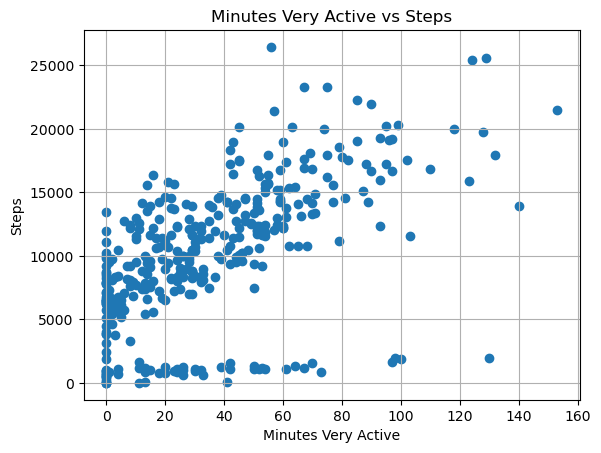

In [84]:
file_path = "Fitbit.csv"
fitbit = pd.read_csv(file_path)


plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.title("Minutes Very Active vs Steps")
plt.grid(True)
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# The plot shows a generally positive trend between "Minutes Very Active" and "Steps." As the "Minutes Very Active" increases, there is a tendency for the "Steps" count to increase as well. This suggests that people who are more active in terms of minutes tend to take more steps.


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [85]:
correlation = fitbit["Minutes Sedentary"].corr(fitbit["Steps"])
print("Correlation between Minutes Sedentary and Steps:", correlation)

Correlation between Minutes Sedentary and Steps: 0.07690608062990097


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

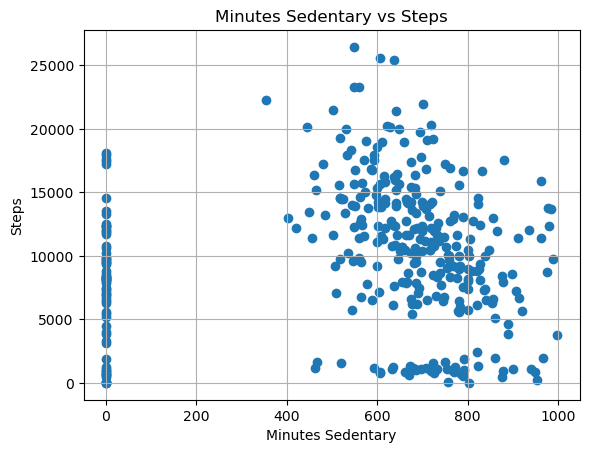

Correlation between Minutes Sedentary and Steps: 0.07690608062990097


In [86]:
#have a negative correlation, stats have a big dispersion
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.title("Minutes Sedentary vs Steps")
plt.grid(True)
plt.show()


correlation = fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

print("Correlation between Minutes Sedentary and Steps:", correlation)

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [87]:
correlation = fitbit["MinutesOfSleep"].corr(fitbit["Steps"])
print("Correlation between MinutesOfSleep and Steps:", correlation)

Correlation between MinutesOfSleep and Steps: 0.13098565950836388


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

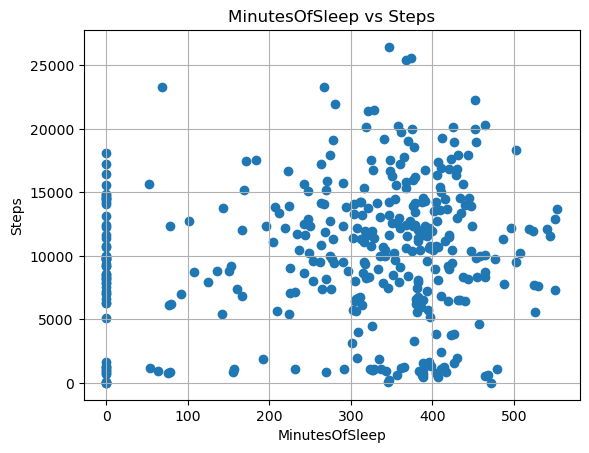

Correlation between MinutesOfSleep and Steps: 0.13098565950836388


In [88]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.title("MinutesOfSleep vs Steps")
plt.grid(True)
plt.show()

correlation = fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

print("Correlation between MinutesOfSleep and Steps:", correlation)

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [89]:
selected_columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset_fitbit = fitbit.loc[:, selected_columns]


cor_fit = subset_fitbit.corr()

print("Correlation Matrix:")
print(cor_fit)

Correlation Matrix:
                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [90]:
selected_columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset_fitbit = fitbit.loc[:, selected_columns]


cor_fit = subset_fitbit.corr()


cor_steps = cor_fit.loc['Steps'].sort_values(ascending=False)

print("Highly correlated features with Steps:")
print(cor_steps)


Highly correlated features with Steps:
Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [91]:
file_path = "Time_Grades.csv"
time_grades = pd.read_csv(file_path)
print(time_grades.head())

     Name  Study time  Grade
0    Jose           4      4
1   Maria           9      7
2   David           8      9
3   Sonia          10      7
4  Samuel          20      9


#### Show visually the frequency distribution of the time_grades dataset.

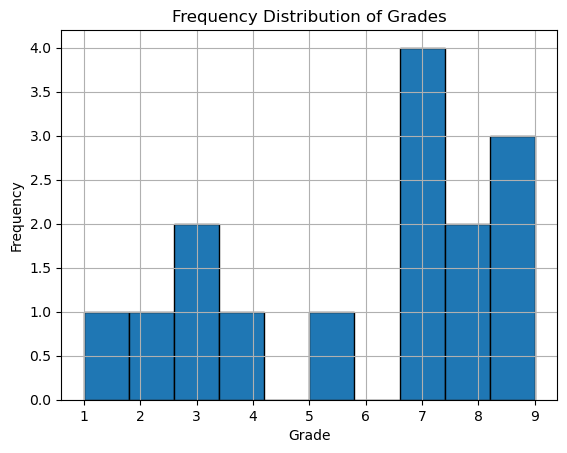

In [93]:
plt.hist(time_grades['Grade'], bins=10, edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Grades')
plt.grid(True)
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [95]:
#Both correlation coefficients are positive and relatively high, indicating a strong positive relationship between study time and grade
pearson_corr = time_grades['Study time'].corr(time_grades['Grade'], method='pearson')
spearman_corr = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')
print("Pearson Correlation:", pearson_corr)
print("Spearman Correlation:", spearman_corr)

Pearson Correlation: 0.7980456073578858
Spearman Correlation: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

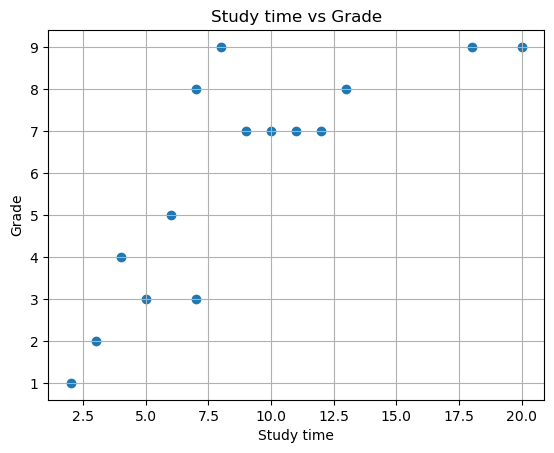

In [97]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.title("Study time vs Grade")
plt.grid(True)
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# Pearson correlation is suitable for assessing linear relationships between two continuous variables when the data is normally distributed. Spearman correlation, on the other hand, is used when the variables are ordinal or non-normally distributed and is more robust to non-linear relationships and outliers.
